Iteration 1/50
Number of samples:  50
One step predictive accuracy:  4.908867263984108
Iteration 2/50
Number of samples:  100
One step predictive accuracy:  3.801849025062351
Iteration 3/50
Number of samples:  150
One step predictive accuracy:  3.328915663655893
Iteration 4/50
Number of samples:  200
One step predictive accuracy:  2.4061849300956637
Iteration 5/50
Number of samples:  250
One step predictive accuracy:  2.391442898847208
Iteration 6/50
Number of samples:  300
One step predictive accuracy:  2.7379296269331523
Iteration 7/50
Number of samples:  350
One step predictive accuracy:  1.9399342157844357
Iteration 8/50
Number of samples:  400
One step predictive accuracy:  2.2163080692703385
Iteration 9/50
Number of samples:  450
One step predictive accuracy:  2.4838370597062185
Iteration 10/50
Number of samples:  500
One step predictive accuracy:  1.6003512921839587
Iteration 11/50
Number of samples:  550
One step predictive accuracy:  1.8691653369287557
Iteration 12/50
Number o

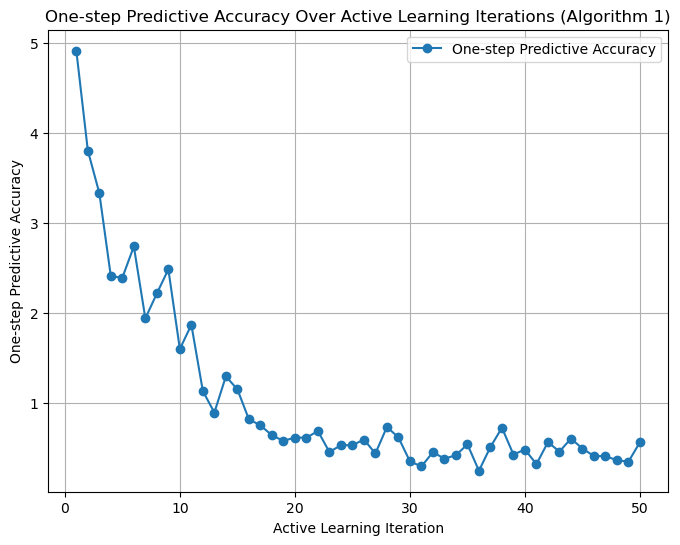

In [2]:
import sys
import os
sys.path.append(os.path.abspath(".."))

# Import modules and classes
from dynamical_systems.mass_spring_damper_system import MassSpringDamperEnv
from models.feedforward_nn import FeedforwardNN
from active_learning import ActiveLearningEvaluator

# Hyperparameters
HIDDEN_SIZE = 64          # Hidden units in the neural network
HORIZON = 50              # Trajectory time horizon
NUM_AL_ITERATIONS = 50    # Number of active learning iterations
NUM_EPOCHS = 20           # Training epochs per iteration
BATCH_SIZE = 25           # Batch size for training
LEARNING_RATE = 1e-3      # Learning rate for the optimizer

# Initialize the true environment
true_env = MassSpringDamperEnv()

# Set up the dynamics model and learned environment
state_dim = true_env.observation_space.shape[0]
action_dim = true_env.action_space.shape[0]
dynamics_model = FeedforwardNN(state_dim, action_dim, hidden_size=HIDDEN_SIZE)
learned_env = MassSpringDamperEnv(model=dynamics_model)

# Initialize the active learning evaluator
active_learning_evaluator = ActiveLearningEvaluator(
    true_env=true_env,
    learned_env=learned_env,
    horizon=HORIZON,
    num_al_iterations=NUM_AL_ITERATIONS,
    num_epochs=NUM_EPOCHS,
    batch_size=BATCH_SIZE,
    learning_rate=LEARNING_RATE
)

# Run the active learning process
active_learning_evaluator.active_learning()